In [1573]:
import pandas as pd
import matplotlib.pyplot as plt
import heapq

# Load Data

### Read CSV

In [1574]:
df = pd.read_csv("data/rotten_tomatoes_movies.csv")

df['original_release_date'] = pd.to_datetime(df['original_release_date'])


print(f"There are {len(df)} rows")

df.head(3)

There are 17712 rows


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


### Drop Features

In [1575]:
df = df.drop(["rotten_tomatoes_link", "movie_info", "critics_consensus", "tomatometer_status", 
              "audience_status", "tomatometer_top_critics_count", "tomatometer_fresh_critics_count",
              "tomatometer_rotten_critics_count"], axis=1)
df.head(3)

,movie_title,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,49.0,149.0,53.0,254421.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,87.0,142.0,64.0,11574.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,67.0,24.0,53.0,14684.0


### Drop Rows

In [1576]:
print(f"The most common number of audience reviews for a movie is {int(df['audience_count'].mode().iloc[0])}")

print()

vals = df.nsmallest(5145, 'audience_count')['audience_count'].value_counts()
print(vals)
print("About 5000 movies have less than 1000 audience reviews")

print()

print('Drop all movies with less than 1000 audience reviews')
df = df[df["audience_count"] > 1000]

print(f"Now the most common number of audience reviews for a movie is {int(df['audience_count'].mode().iloc[0])}")

print()

print(f"There are now {len(df)} rows")

The most common number of audience reviews for a movie is 5

audience_count
5.0      24
11.0     22
6.0      20
71.0     19
7.0      18
         ..
954.0     1
992.0     1
988.0     1
987.0     1
986.0     1
Name: count, Length: 962, dtype: int64
About 5000 movies have less than 1000 audience reviews

Drop all movies with less than 1000 audience reviews
Now the most common number of audience reviews for a movie is 1126

There are now 12272 rows


In [1577]:
# cutoff_date = pd.Timestamp('1990-01-01')
cutoff_date = pd.Timestamp('2000-01-01')
# cutoff_date = pd.Timestamp('2010-01-01')
df = df[df['original_release_date'] >= cutoff_date]

print(f"There are now {len(df)} rows")
df.head(3)


There are now 7137 rows


,movie_title,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,49.0,149.0,53.0,254421.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,87.0,142.0,64.0,11574.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2013-06-22,109.0,Warner Bros. Pictures,8.0,149.0,37.0,411140.0


# Evaluate Features

### Distribution of Ratings

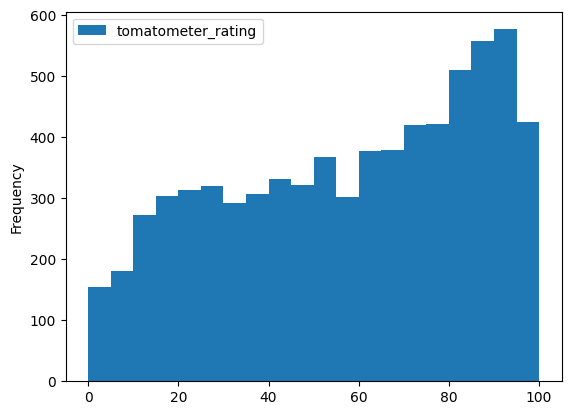

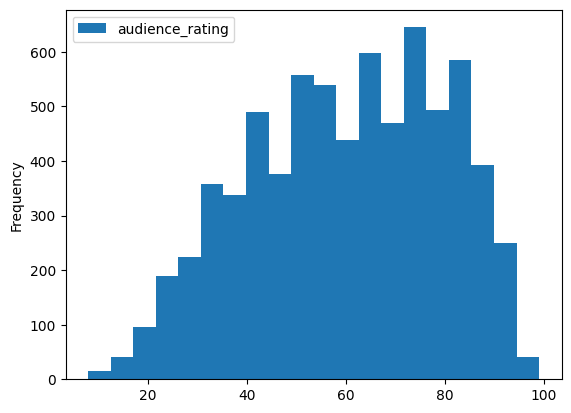

In [1578]:
df.plot(y='tomatometer_rating', kind='hist', bins=20)
df.plot(y='audience_rating', kind='hist', bins=20)
plt.show()

### Understanding How Rotten Tomatoes Ratings Work

Tomatometer: This score is based on the percentage of professional critics who give a movie a positive review.

Audience Score: This represents the percentage of users who rated the movie  positively.

### Release Date

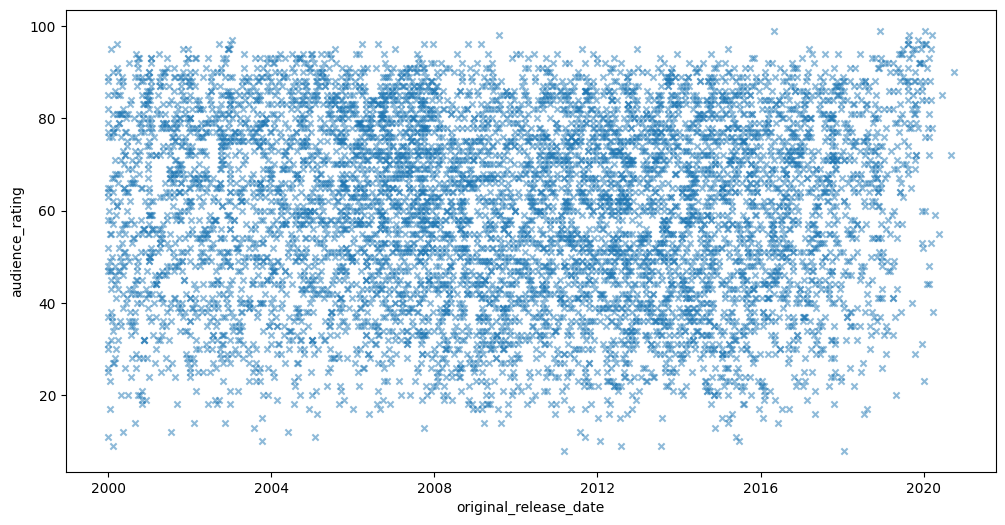

Time period does not seem to affect ratings much
However, it still may be a good idea to drop old movies to remove outdated actors, directors, etc


In [1579]:
df.plot(x='original_release_date', y='audience_rating', kind='scatter', marker='x', alpha=0.5, figsize=(12, 6))
plt.show()

print("Time period does not seem to affect ratings much")
print("However, it still may be a good idea to drop old movies to remove outdated actors, directors, etc")

### Content Ratings

In [1580]:
vals = df['content_rating'].value_counts()
print(vals)

print()

for val in vals.keys():
  rating = df[df['content_rating'] == val]
  print(f"Rated {val} ({len(rating)} movies):")
  print(f"\tAverage Audience rating of {round(rating['tomatometer_rating'].mean(), 2)} with deviation of +/- {round(rating['tomatometer_rating'].std(), 2)}")
  print(f"\tAverage Critic rating of {round(rating['audience_rating'].mean(), 2)} with deviation of +/- {round(rating['audience_rating'].std(), 2)}")


content_rating
R        3168
PG-13    1951
NR       1045
PG        769
G         192
NC17       12
Name: count, dtype: int64

Rated R (3168 movies):
	Average Audience rating of 55.81 with deviation of +/- 26.76
	Average Critic rating of 57.17 with deviation of +/- 19.9
Rated PG-13 (1951 movies):
	Average Audience rating of 49.53 with deviation of +/- 28.39
	Average Critic rating of 59.66 with deviation of +/- 19.0
Rated NR (1045 movies):
	Average Audience rating of 74.69 with deviation of +/- 22.65
	Average Critic rating of 66.36 with deviation of +/- 18.25
Rated PG (769 movies):
	Average Audience rating of 56.51 with deviation of +/- 28.3
	Average Critic rating of 63.77 with deviation of +/- 18.68
Rated G (192 movies):
	Average Audience rating of 62.64 with deviation of +/- 28.39
	Average Critic rating of 65.03 with deviation of +/- 18.13
Rated NC17 (12 movies):
	Average Audience rating of 68.17 with deviation of +/- 21.04
	Average Critic rating of 65.92 with deviation of +/- 20.13


### Genre

In [1581]:
genres_df = df['genres'].str.get_dummies(sep=', ')
vals = genres_df.columns
print(f"There are {len(vals)} unique genres")

df = df.drop('genres', axis=1).join(genres_df)

for val in vals:
  rating = df[df[val] == 1]
  print(f"""\tAverage audience rating of {round(rating['audience_rating'].mean(), 2)} +/- {round(rating['audience_rating'].std(), 2)} for movies with genre "{val}" ({len(rating)} movies)""")

There are 21 unique genres
	Average audience rating of 58.9 +/- 19.78 for movies with genre "Action & Adventure" (1531 movies)
	Average audience rating of 65.14 +/- 17.96 for movies with genre "Animation" (354 movies)
	Average audience rating of 72.5 +/- 13.59 for movies with genre "Anime & Manga" (6 movies)
	Average audience rating of 67.25 +/- 17.23 for movies with genre "Art House & International" (1089 movies)
	Average audience rating of 62.37 +/- 18.93 for movies with genre "Classics" (41 movies)
	Average audience rating of 56.73 +/- 18.22 for movies with genre "Comedy" (2481 movies)
	Average audience rating of 52.42 +/- 17.01 for movies with genre "Cult Movies" (12 movies)
	Average audience rating of 76.41 +/- 13.07 for movies with genre "Documentary" (670 movies)
	Average audience rating of 62.57 +/- 18.64 for movies with genre "Drama" (3960 movies)
	Average audience rating of 71.03 +/- 13.88 for movies with genre "Faith & Spirituality" (31 movies)
	Average audience rating of 62

In [1582]:
df.head(3)

,movie_title,content_rating,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_rating,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,PG,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,49.0,...,0,0,0,0,0,1,0,0,0,0
1,Please Give,R,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,87.0,...,0,0,0,0,0,0,0,0,0,0
5,"10,000 B.C.",PG-13,Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2013-06-22,109.0,Warner Bros. Pictures,8.0,...,0,0,0,0,0,0,0,0,0,0


### Actors

In [1583]:
# actors_df = df['actors'].str.get_dummies(sep=', ')
# vals = actors_df.columns
# print(f"There are {len(vals)} unique actors")

### Directors

In [1584]:
# directors_df = df['directors'].str.get_dummies(sep=', ')
# vals = directors_df.columns
# print(f"There are {len(vals)} unique directors")

### Production Company


Biggest Production Companies
	Average audience rating of 59.23 +/- 18.82 for movies produced by Warner Bros. Pictures (315 movies)
	Average audience rating of 56.29 +/- 19.07 for movies produced by 20th Century Fox (291 movies)
	Average audience rating of 58.75 +/- 17.52 for movies produced by Universal Pictures (280 movies)
	Average audience rating of 58.32 +/- 19.47 for movies produced by IFC Films (262 movies)
	Average audience rating of 71.32 +/- 17.0 for movies produced by Sony Pictures Classics (221 movies)
	Average audience rating of 56.73 +/- 18.56 for movies produced by Paramount Pictures (199 movies)
	Average audience rating of 58.14 +/- 20.51 for movies produced by Magnolia Pictures (198 movies)
	Average audience rating of 58.9 +/- 17.78 for movies produced by Sony Pictures (164 movies)
	Average audience rating of 64.95 +/- 17.51 for movies produced by Focus Features (119 movies)
	Average audience rating of 68.72 +/- 18.4 for movies produced by Walt Disney Pictures (116 mov

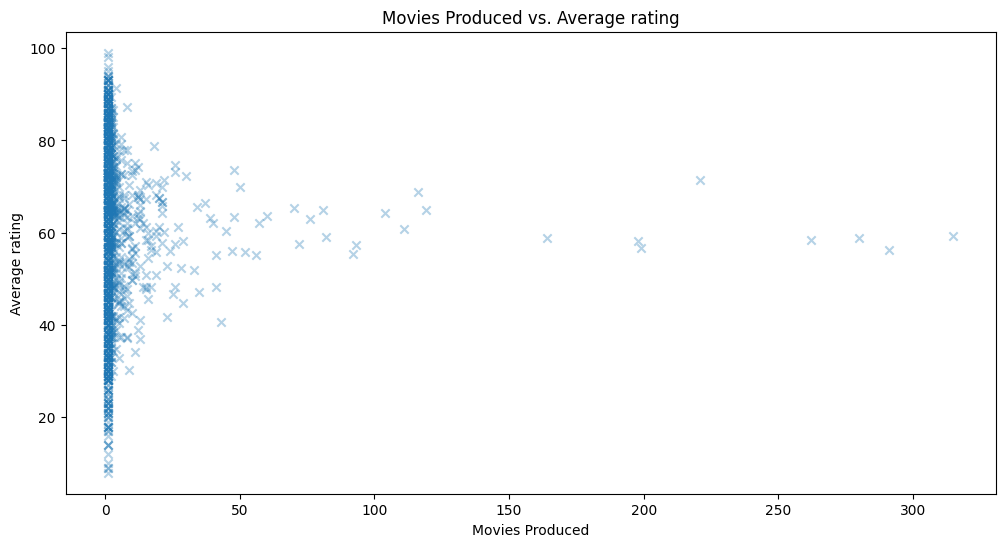

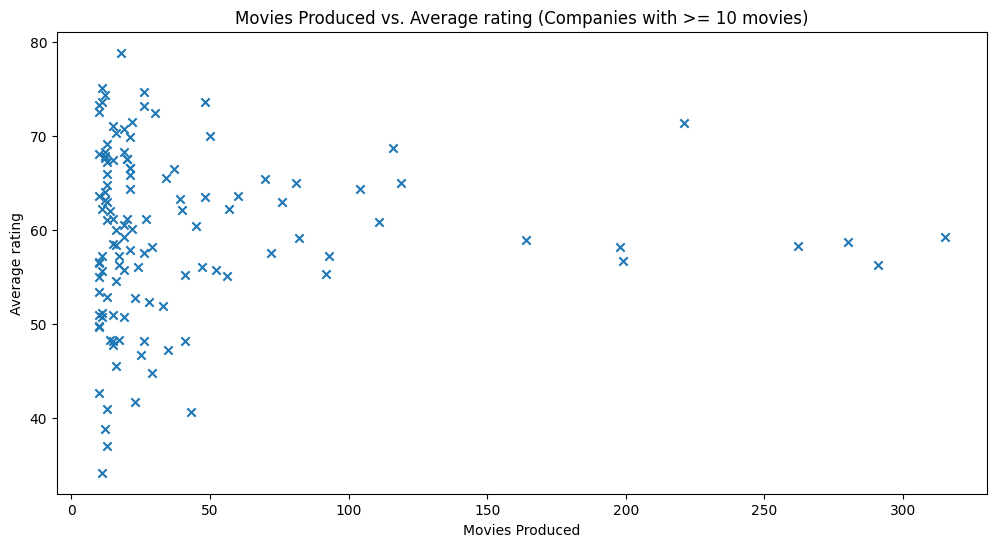

In [1585]:
vals = df['production_company'].value_counts()

print()
print('Biggest Production Companies')
for val in vals.keys()[:10]:
  rating = df[df['production_company'] == val]
  print(f"\tAverage audience rating of {round(rating['audience_rating'].mean(), 2)} +/- {round(rating['audience_rating'].std(), 2)} for movies produced by {val} ({len(rating)} movies)")

print()

vals1 = []
vals2 = []
for val in vals.keys():
  rating = df[df['production_company'] == val]
  avg = round(rating['audience_rating'].mean(), 2)
  std = round(rating['audience_rating'].std(), 2)
  vals1.append({
      'name': val, 
      'average': avg, 
      'std': std,
      'count': len(rating)
    })
  if len(rating) >= 10:
    vals2.append({
      'name': val, 
      'average': avg,
      'std': std, 
      'count': len(rating)
    })

print(f"Most Highly Rated Production Companies (all {len(vals1)} companies)")
best_rated_producers = heapq.nlargest(5, vals1, key=lambda l: l['average'])
for x in best_rated_producers:
  print(f"\t{x['name']}: {x['average']} ({x['count']} movies)")

print()
print(f"Most Highly Rated Production Companies with >= 10 movies ({len(vals2)} companies)")
best_rated_producers = heapq.nlargest(5, vals2, key=lambda l: l['average'])
for x in best_rated_producers:
  print(f"\t{x['name']}: {x['average']} +/- {x['std']} ({x['count']} movies)")


fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter([val['count'] for val in vals1], [val['average'] for val in vals1], marker='x', alpha=0.33)
ax.set_title('Movies Produced vs. Average rating')
ax.set_xlabel('Movies Produced')
ax.set_ylabel('Average rating')

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter([val['count'] for val in vals2], [val['average'] for val in vals2], marker='x')
ax.set_title('Movies Produced vs. Average rating (Companies with >= 10 movies)')
ax.set_xlabel('Movies Produced')
ax.set_ylabel('Average rating')

plt.show()

### Runtime

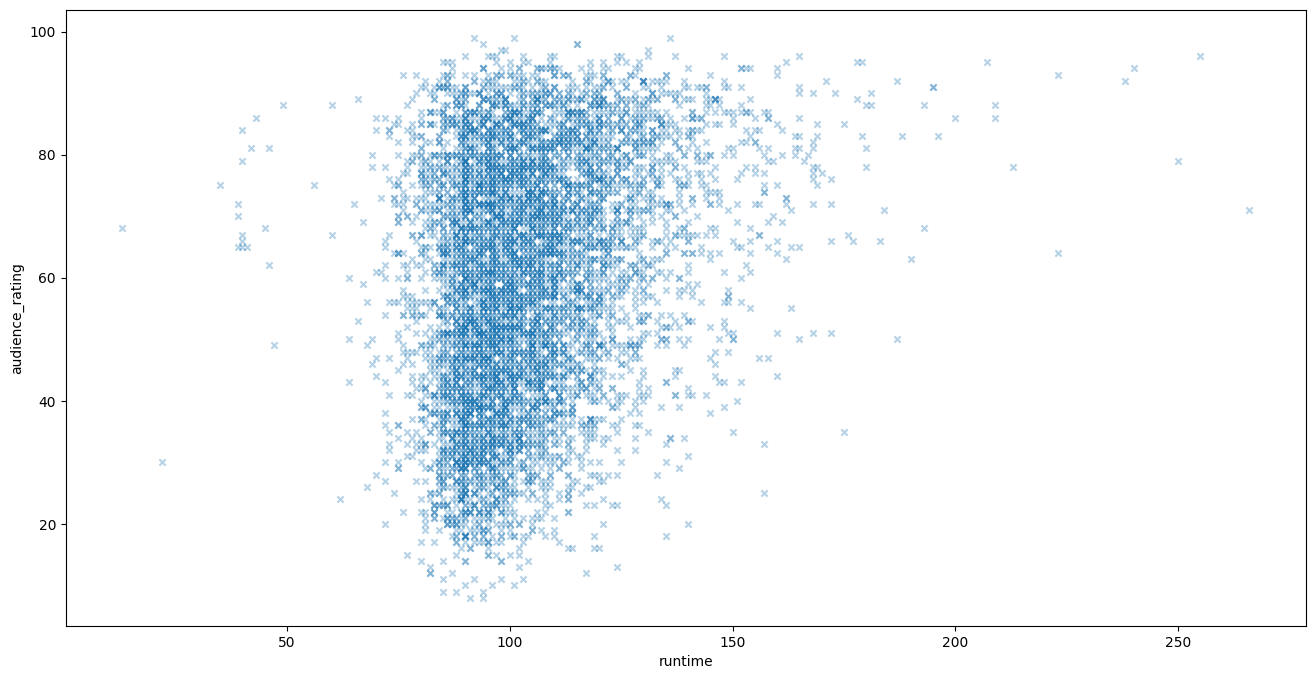

In [1586]:
df.plot(x='runtime', y='audience_rating', kind='scatter', marker='x', figsize=(16, 8), alpha=0.33)
plt.show()